<a href="https://colab.research.google.com/github/Hetvi48/AeroCare/blob/main/Advance_DataSet_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd

from IPython.display import display, HTML
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.io as pio


import seaborn as sns
from importlib import reload
import matplotlib.pyplot as plt
import matplotlib
import warnings

# Configure Jupyter Notebook
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 500)
pd.set_option('display.expand_frame_repr', False)
# pd.set_option('max_colwidth', -1)
display(HTML("<style>div.output_scroll { height: 35em; }</style>"))

reload(plt)
%matplotlib inline
%config InlineBackend.figure_format ='retina'

warnings.filterwarnings('ignore')

# configure plotly graph objects
pio.renderers.default = 'iframe'
# pio.renderers.default = 'vscode'

pio.templates["ck_template"] = go.layout.Template(
    layout_colorway = px.colors.sequential.Viridis,
#     layout_hovermode = 'closest',
#     layout_hoverdistance = -1,
    layout_autosize=False,
    layout_width=800,
    layout_height=600,
    layout_font = dict(family="Calibri Light"),
    layout_title_font = dict(family="Calibri"),
    layout_hoverlabel_font = dict(family="Calibri Light"),
#     plot_bgcolor="white",
)

# pio.templates.default = 'seaborn+ck_template+gridon'
pio.templates.default = 'ck_template+gridon'
# pio.templates.default = 'seaborn+gridon'
# pio.templates

In [ ]:
index_names = ['engine', 'cycle']
setting_names = ['setting_1', 'setting_2', 'setting_3']
sensor_names=[ "(Fan inlet temperature) (◦R)",
"(LPC outlet temperature) (◦R)",
"(HPC outlet temperature) (◦R)",
"(LPT outlet temperature) (◦R)",
"(Fan inlet Pressure) (psia)",
"(bypass-duct pressure) (psia)",
"(HPC outlet pressure) (psia)",
"(Physical fan speed) (rpm)",
"(Physical core speed) (rpm)",
"(Engine pressure ratio(P50/P2)",
"(HPC outlet Static pressure) (psia)",
"(Ratio of fuel flow to Ps30) (pps/psia)",
"(Corrected fan speed) (rpm)",
"(Corrected core speed) (rpm)",
"(Bypass Ratio) ",
"(Burner fuel-air ratio)",
"(Bleed Enthalpy)",
"(Required fan speed)",
"(Required fan conversion speed)",
"(High-pressure turbines Cool air flow)",
"(Low-pressure turbines Cool air flow)" ]
col_names = index_names + setting_names + sensor_names

In [ ]:
df_train = pd.read_csv('drive/MyDrive/archive/CMaps/train_FD004.txt',sep=r'\s+',header=None,index_col=False,names=col_names)
df_test = pd.read_csv('drive/MyDrive/archive/CMaps/test_FD004.txt',sep=r'\s+',header=None,index_col=False,names=col_names)
df_test_RUL = pd.read_csv('drive/MyDrive/archive/CMaps/RUL_FD004.txt',sep=r'\s+',header=None,index_col=False,names=['RUL'])

In [ ]:
df_train.head()

,engine,cycle,setting_1,setting_2,setting_3,(Fan inlet temperature) (◦R),(LPC outlet temperature) (◦R),(HPC outlet temperature) (◦R),(LPT outlet temperature) (◦R),(Fan inlet Pressure) (psia),(bypass-duct pressure) (psia),(HPC outlet pressure) (psia),(Physical fan speed) (rpm),(Physical core speed) (rpm),(Engine pressure ratio(P50/P2),(HPC outlet Static pressure) (psia),(Ratio of fuel flow to Ps30) (pps/psia),(Corrected fan speed) (rpm),(Corrected core speed) (rpm),(Bypass Ratio),(Burner fuel-air ratio),(Bleed Enthalpy),(Required fan speed),(Required fan conversion speed),(High-pressure turbines Cool air flow),(Low-pressure turbines Cool air flow)
0,1,1,42.0049,0.8400,100.0,445.00,549.68,1343.43,1112.93,3.91,5.70,137.36,2211.86,8311.32,1.01,41.69,129.78,2387.99,8074.83,9.3335,0.02,330,2212,100.00,10.62,6.3670
1,1,2,20.0020,0.7002,100.0,491.19,606.07,1477.61,1237.50,9.35,13.61,332.10,2323.66,8713.60,1.07,43.94,312.59,2387.73,8046.13,9.1913,0.02,361,2324,100.00,24.37,14.6552
2,1,3,42.0038,0.8409,100.0,445.00,548.95,1343.12,1117.05,3.91,5.69,138.18,2211.92,8306.69,1.01,41.66,129.62,2387.97,8066.62,9.4007,0.02,329,2212,100.00,10.48,6.4213
3,1,4,42.0000,0.8400,100.0,445.00,548.70,1341.24,1118.03,3.91,5.70,137.98,2211.88,8312.35,1.02,41.68,129.80,2388.02,8076.05,9.3369,0.02,328,2212,100.00,10.54,6.4176
4,1,5,25.0063,0.6207,60.0,462.54,536.10,1255.23,1033.59,7.05,9.00,174.82,1915.22,7994.94,0.93,36.48,164.11,2028.08,7865.80,10.8366,0.02,305,1915,84.93,14.03,8.6754


In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61249 entries, 0 to 61248
Data columns (total 26 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   engine                                   61249 non-null  int64  
 1   cycle                                    61249 non-null  int64  
 2   setting_1                                61249 non-null  float64
 3   setting_2                                61249 non-null  float64
 4   setting_3                                61249 non-null  float64
 5   (Fan inlet temperature) (◦R)             61249 non-null  float64
 6   (LPC outlet temperature) (◦R)            61249 non-null  float64
 7   (HPC outlet temperature) (◦R)            61249 non-null  float64
 8   (LPT outlet temperature) (◦R)            61249 non-null  float64
 9   (Fan inlet Pressure) (psia)              61249 non-null  float64
 10  (bypass-duct pressure) (psia)            61249

In [ ]:
df_train.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
engine,61249.0,124.325181,71.995350,1.0000,60.0000,126.0000,185.0000,249.0000
cycle,61249.0,134.311417,89.783389,1.0000,62.0000,123.0000,191.0000,543.0000
setting_1,61249.0,23.999823,14.780722,0.0000,10.0046,25.0014,41.9981,42.0080
setting_2,61249.0,0.571347,0.310703,0.0000,0.2507,0.7000,0.8400,0.8420
setting_3,61249.0,94.031576,14.251954,60.0000,100.0000,100.0000,100.0000,100.0000
(Fan inlet temperature) (◦R),61249.0,472.882435,26.436832,445.0000,445.0000,462.5400,491.1900,518.6700
(LPC outlet temperature) (◦R),61249.0,579.420056,37.342647,535.4800,549.3300,555.7400,607.0700,644.4200
(HPC outlet temperature) (◦R),61249.0,1417.896600,106.167598,1242.6700,1350.5500,1367.6800,1497.4200,1613.0000
(LPT outlet temperature) (◦R),61249.0,1201.915359,119.327591,1024.4200,1119.4900,1136.9200,1302.6200,1440.7700
(Fan inlet Pressure) (psia),61249.0,8.031626,3.622872,3.9100,3.9100,7.0500,10.5200,14.6200


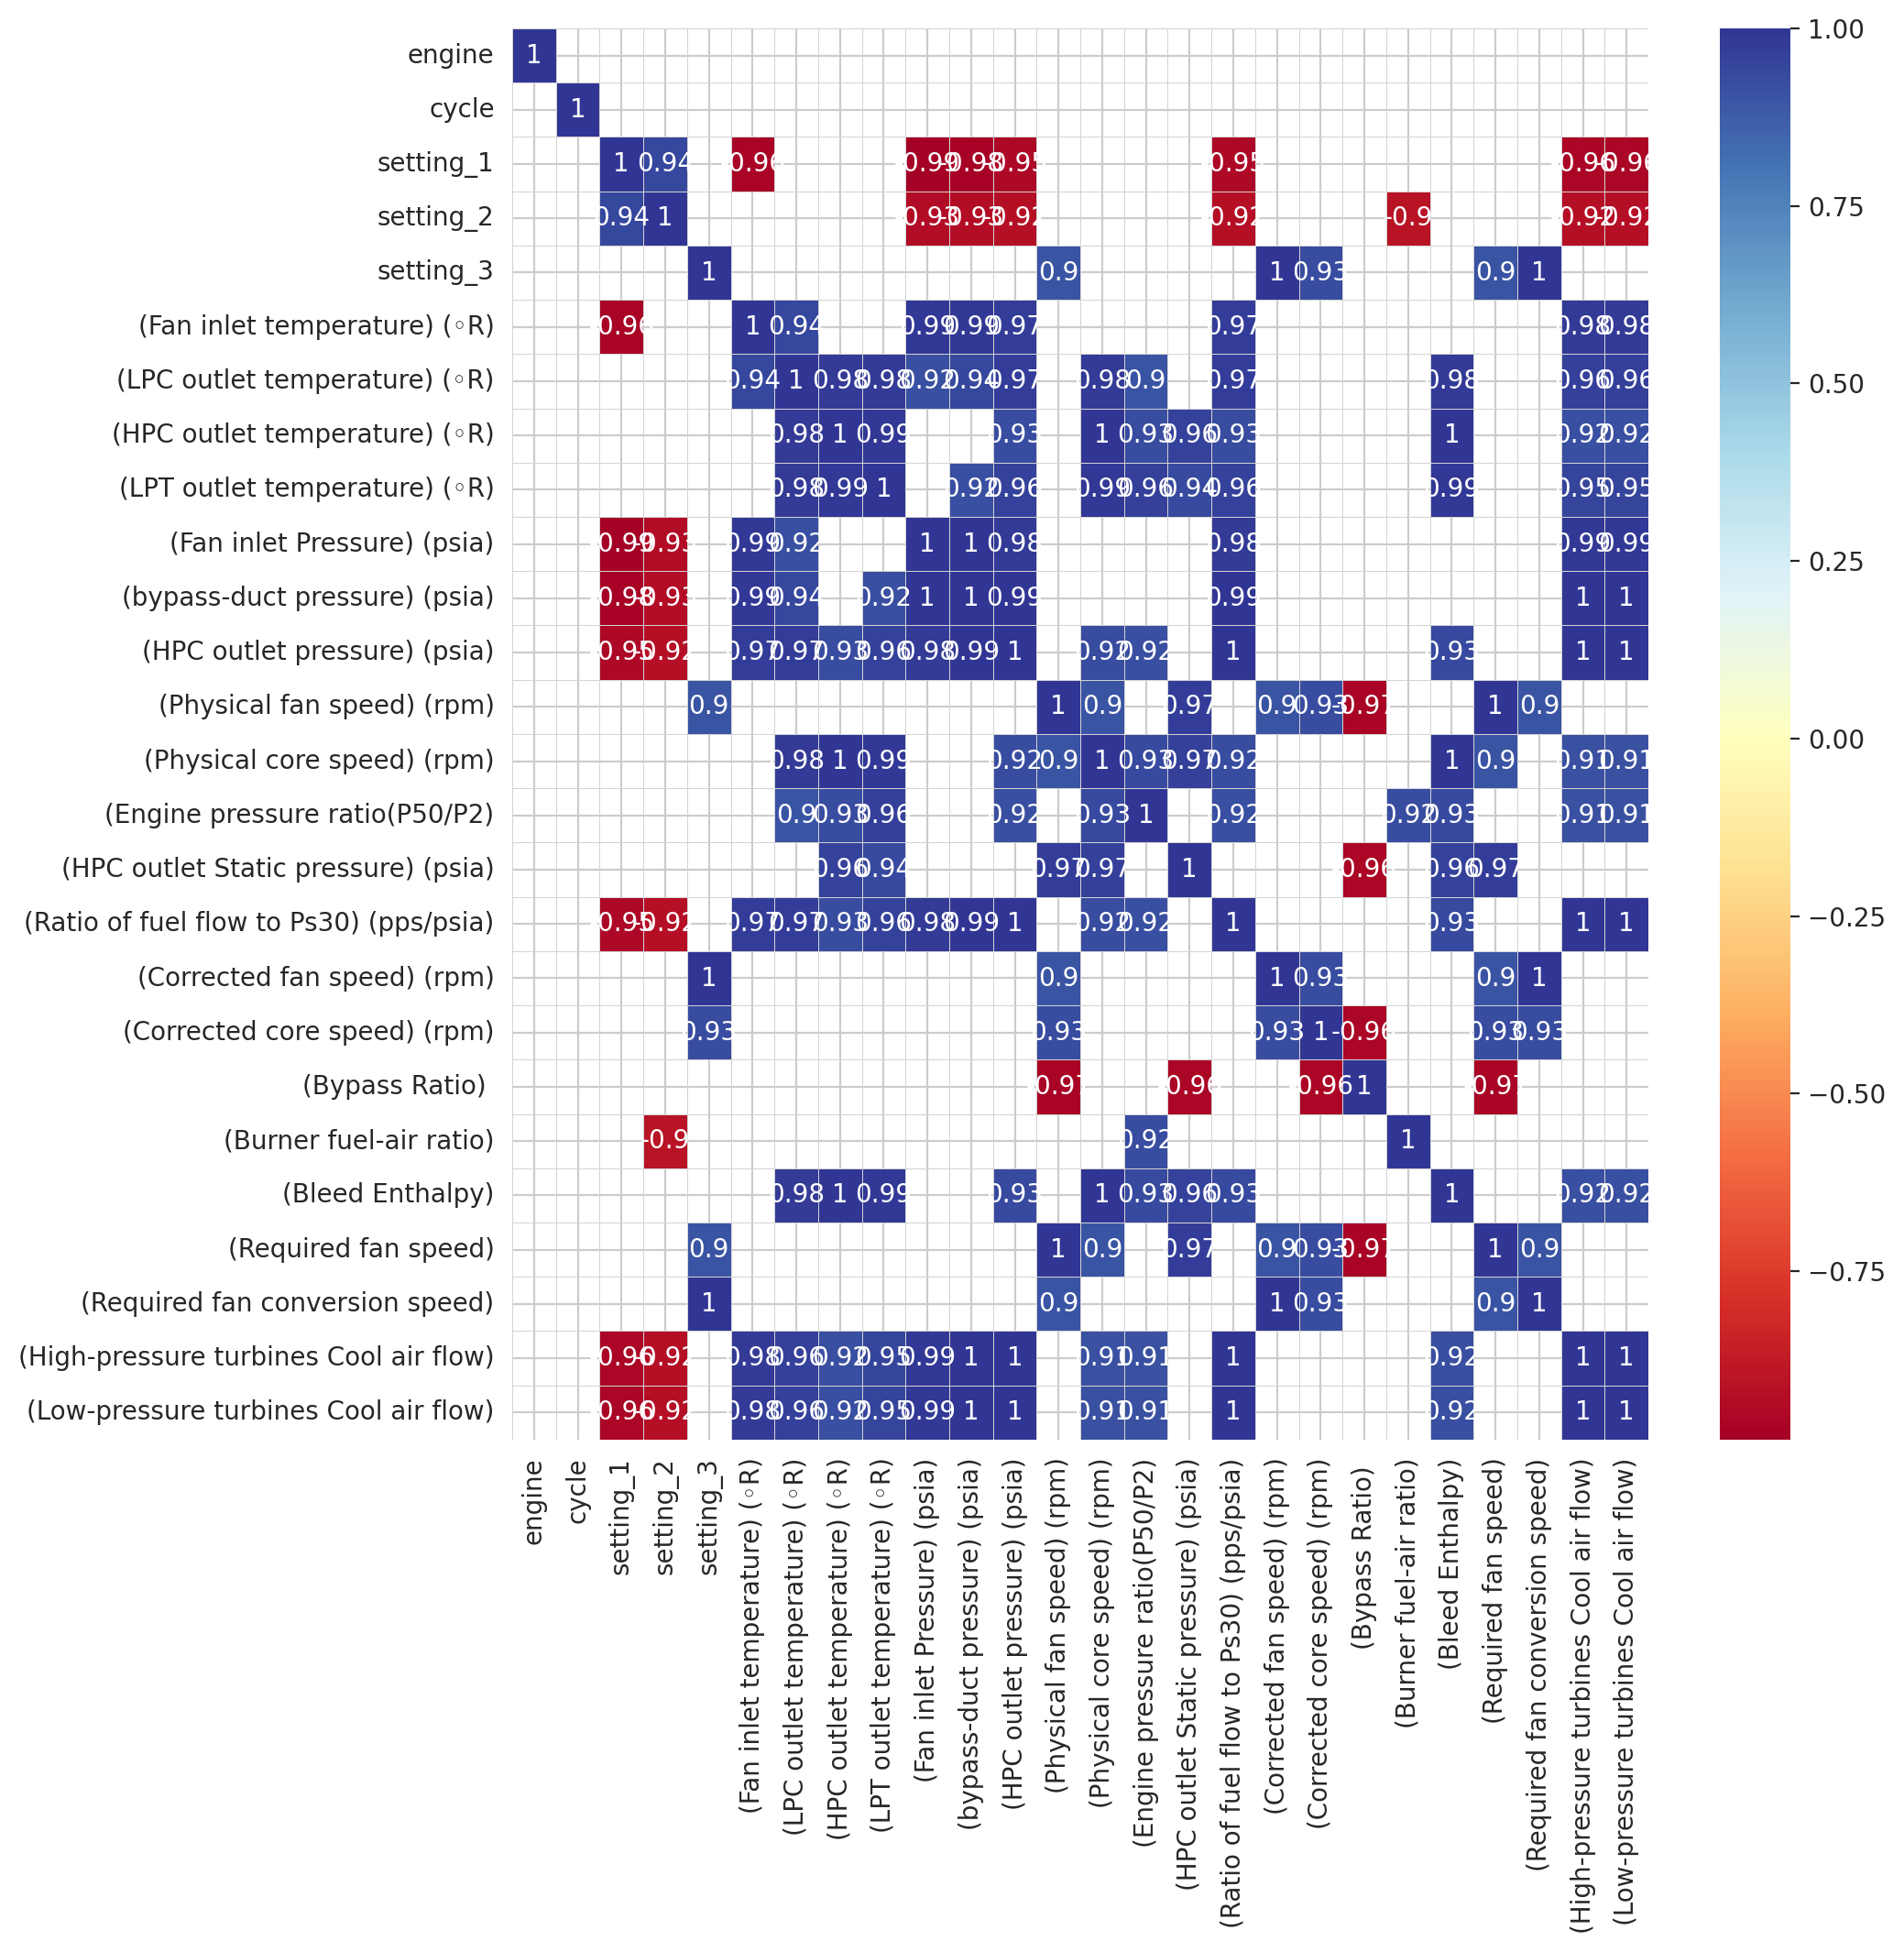

In [ ]:
plt.figure(figsize=(10,10))
threshold = 0.90
sns.set_style("whitegrid", {"axes.facecolor": ".0"})
df_cluster2 = df_train.corr()
mask = df_cluster2.where((abs(df_cluster2) >= threshold)).isna()
plot_kws={"s": 1}
sns.heatmap(df_cluster2,
            cmap='RdYlBu',
            annot=True,
            mask=mask,
            linewidths=0.2,
            linecolor='lightgrey').set_facecolor('white')

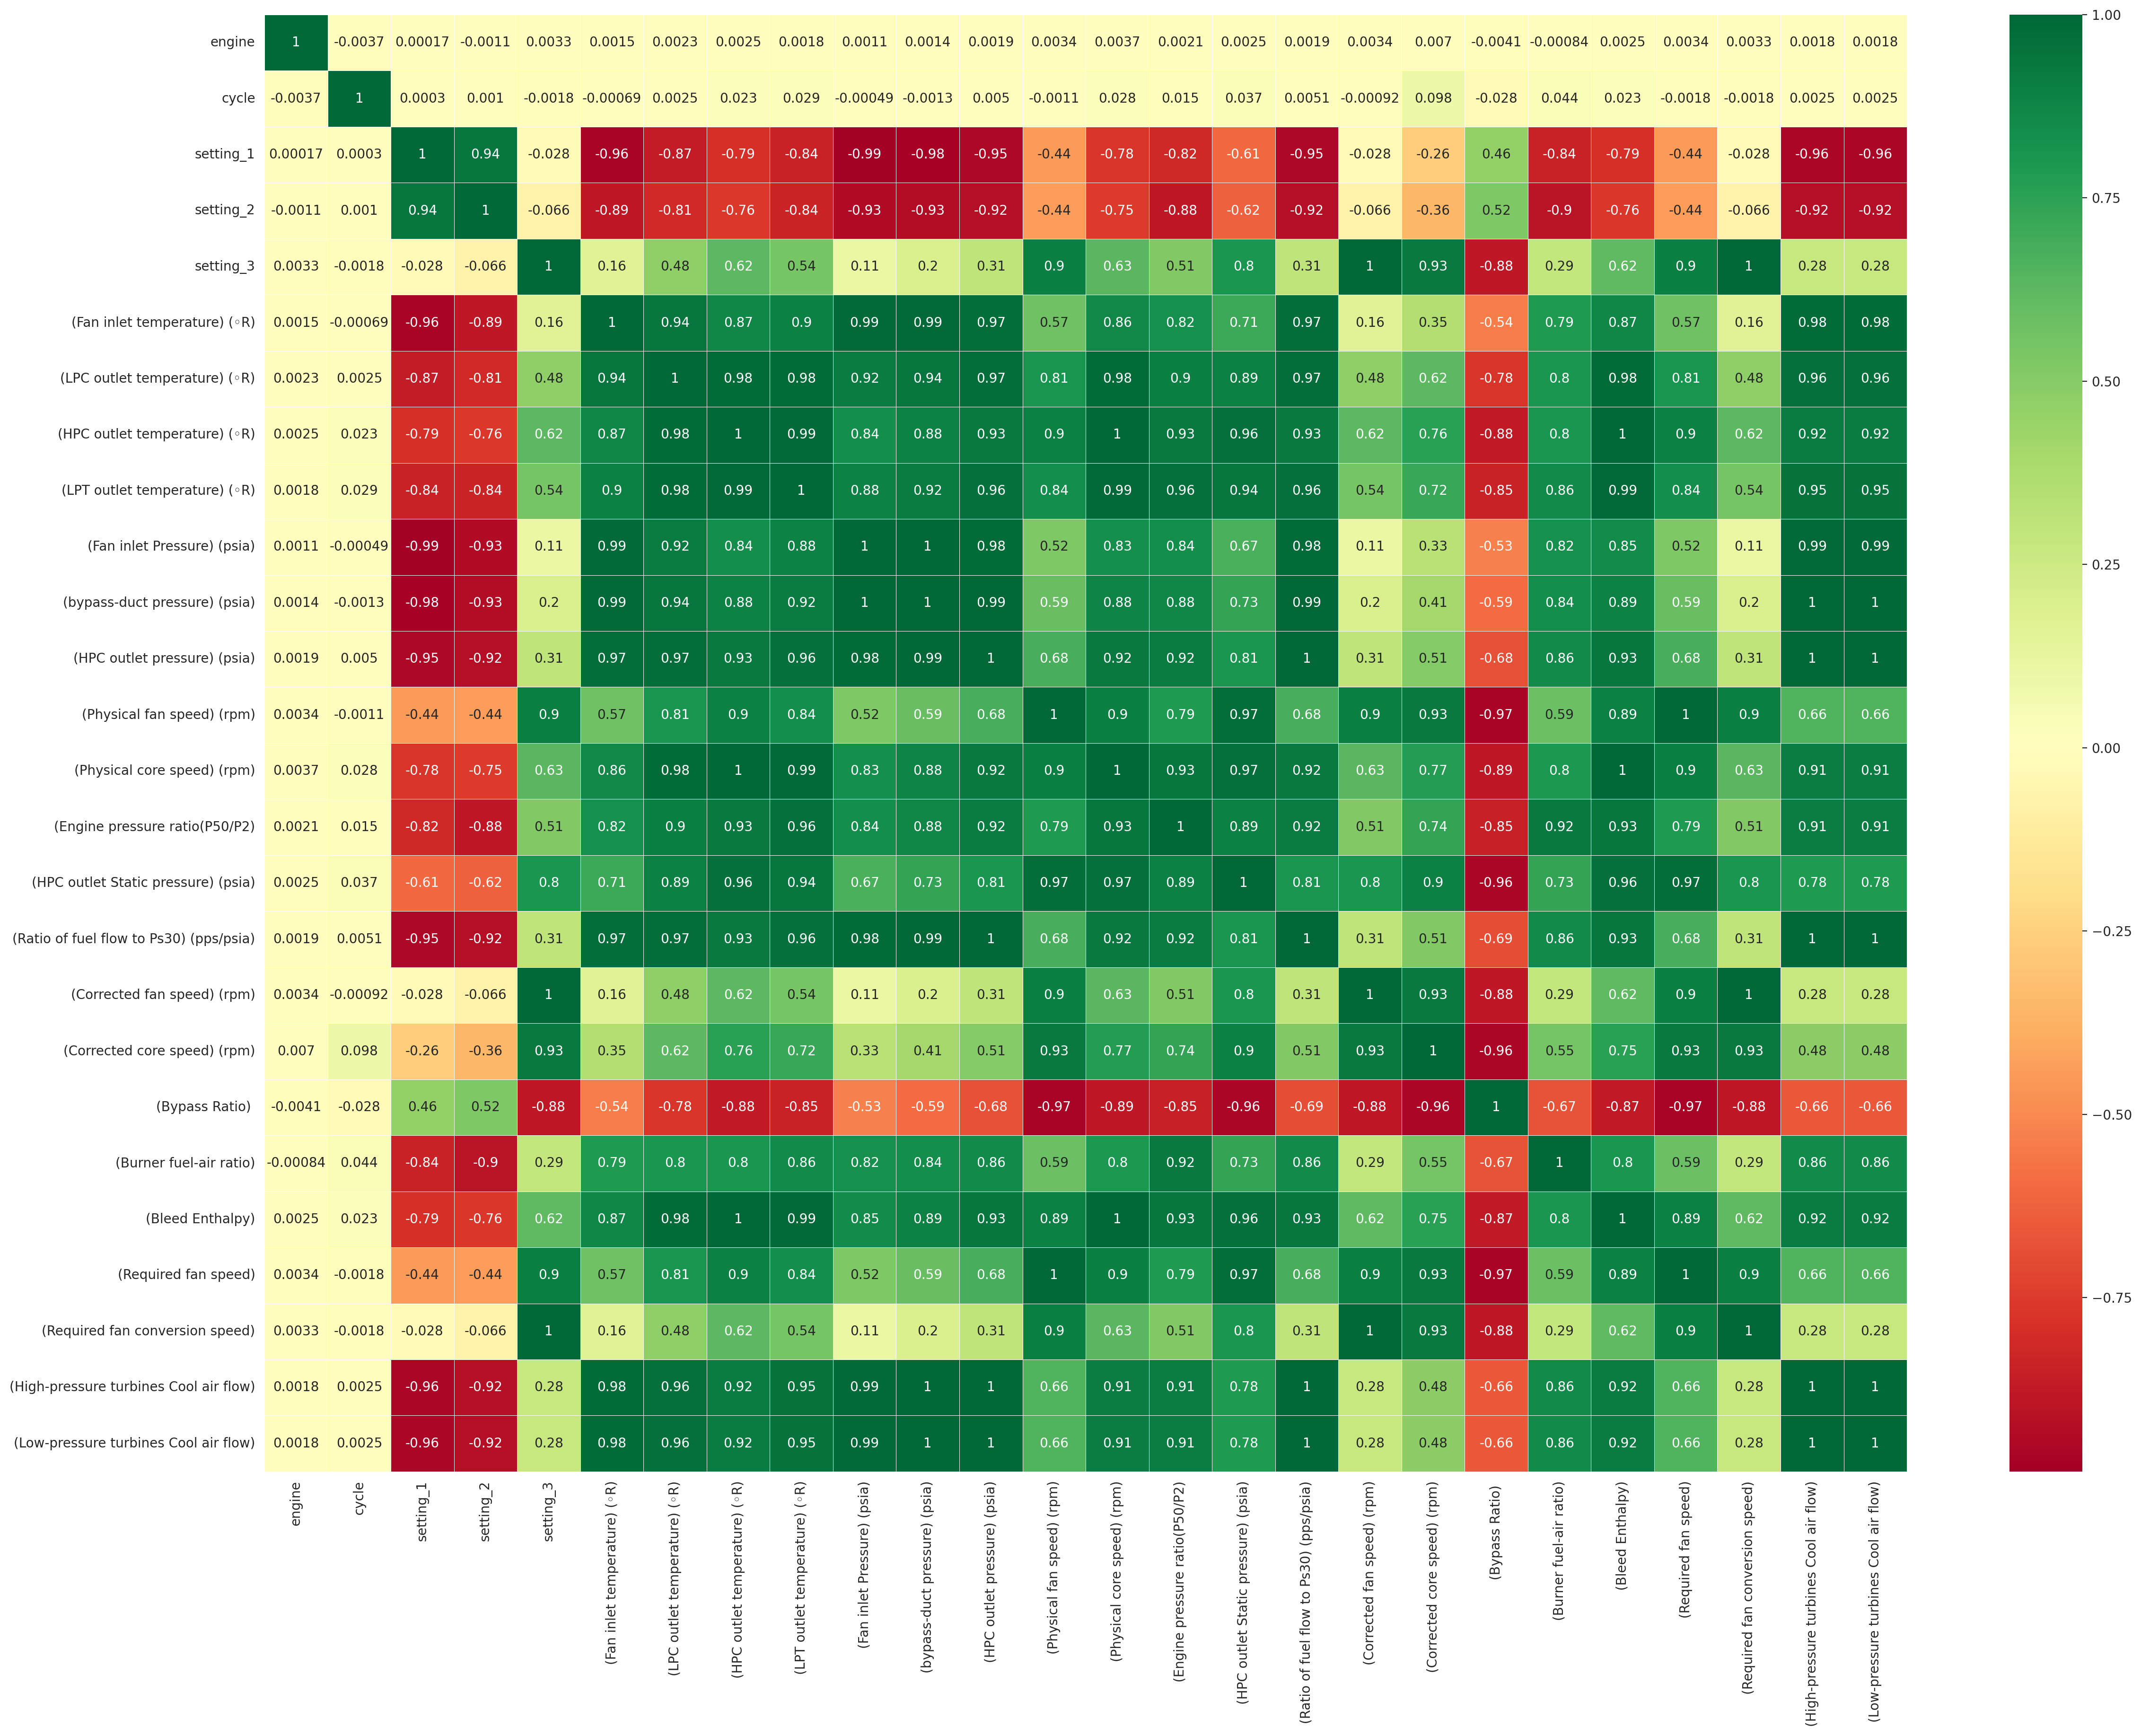

In [ ]:
plt.figure(figsize = (28, 20))

sns.heatmap(df_train.corr(),annot=True,cmap='RdYlGn',linewidths=0.2)
fig=plt.gcf()
# fig.set_size_inches(20,20)
plt.show()

# PCA

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np


In [ ]:
# Features to use for PCA
feature_cols = setting_names + sensor_names

X_train = df_train[feature_cols].values
X_test  = df_test[feature_cols].values


In [ ]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)


In [ ]:
pca = PCA(n_components=0.50, random_state=42)

X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca  = pca.transform(X_test_scaled)

print("Original features:", X_train.shape[1])
print("PCA features:", X_train_pca.shape[1])


Original features: 24
PCA features: 1


In [ ]:
pca = PCA(n_components=10, random_state=42)

X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca  = pca.transform(X_test_scaled)


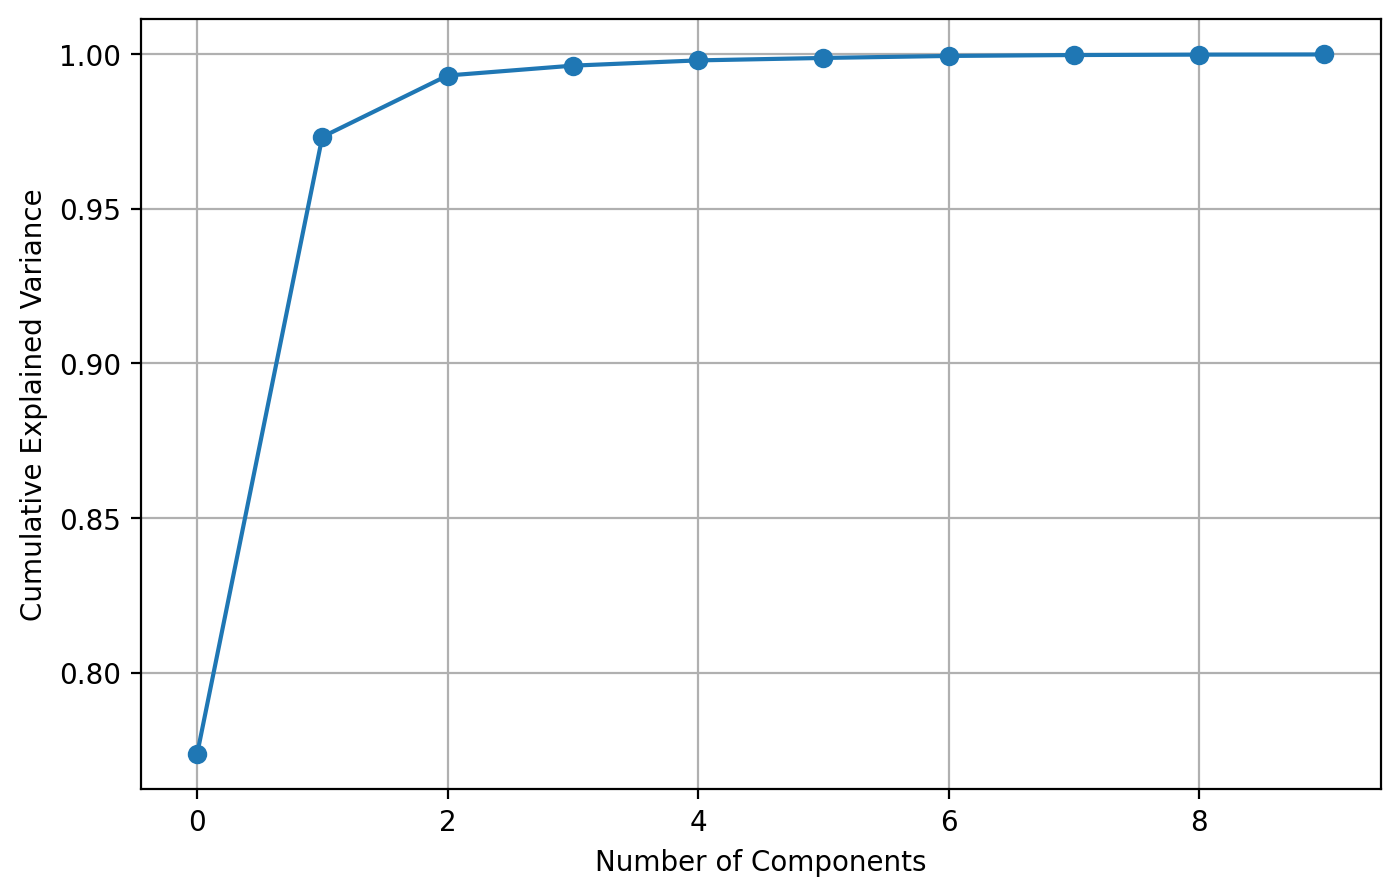

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid()
plt.show()


In [ ]:
pca_cols = [f'PC{i+1}' for i in range(X_train_pca.shape[1])]

df_train_pca = pd.DataFrame(X_train_pca, columns=pca_cols)
df_test_pca  = pd.DataFrame(X_test_pca, columns=pca_cols)

# Add back engine & cycle if needed
df_train_pca = pd.concat([df_train[index_names].reset_index(drop=True),
                           df_train_pca], axis=1)

df_test_pca = pd.concat([df_test[index_names].reset_index(drop=True),
                          df_test_pca], axis=1)


In [ ]:
loadings = pd.DataFrame(
    pca.components_.T,
    index=feature_cols,
    columns=pca_cols
)

print(loadings)


                                              PC1       PC2       PC3       PC4       PC5       PC6       PC7       PC8       PC9      PC10
setting_1                               -0.191833  0.252828 -0.003010 -0.066126  0.266207 -0.037525  0.641791 -0.326076 -0.067809  0.041072
setting_2                               -0.190270  0.224989 -0.374789  0.408269 -0.119966  0.394598 -0.312712  0.129212 -0.349935 -0.077464
setting_3                                0.134038  0.372202 -0.029917  0.022216 -0.215858 -0.085296  0.069105  0.085038  0.155903  0.004321
(Fan inlet temperature) (◦R)             0.205054 -0.195141 -0.254155  0.155908  0.241405 -0.086885 -0.132630 -0.441020  0.100928 -0.057709
(LPC outlet temperature) (◦R)            0.227233 -0.049929 -0.234398  0.142581  0.150632 -0.076179 -0.049216 -0.262278  0.105609 -0.051627
(HPC outlet temperature) (◦R)            0.230419  0.026060 -0.124341  0.102404  0.190466 -0.044804 -0.034266  0.124148 -0.171630  0.892073
(LPT outlet temperat

In [ ]:
pca = PCA(n_components=2, random_state=42)

X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca  = pca.transform(X_test_scaled)


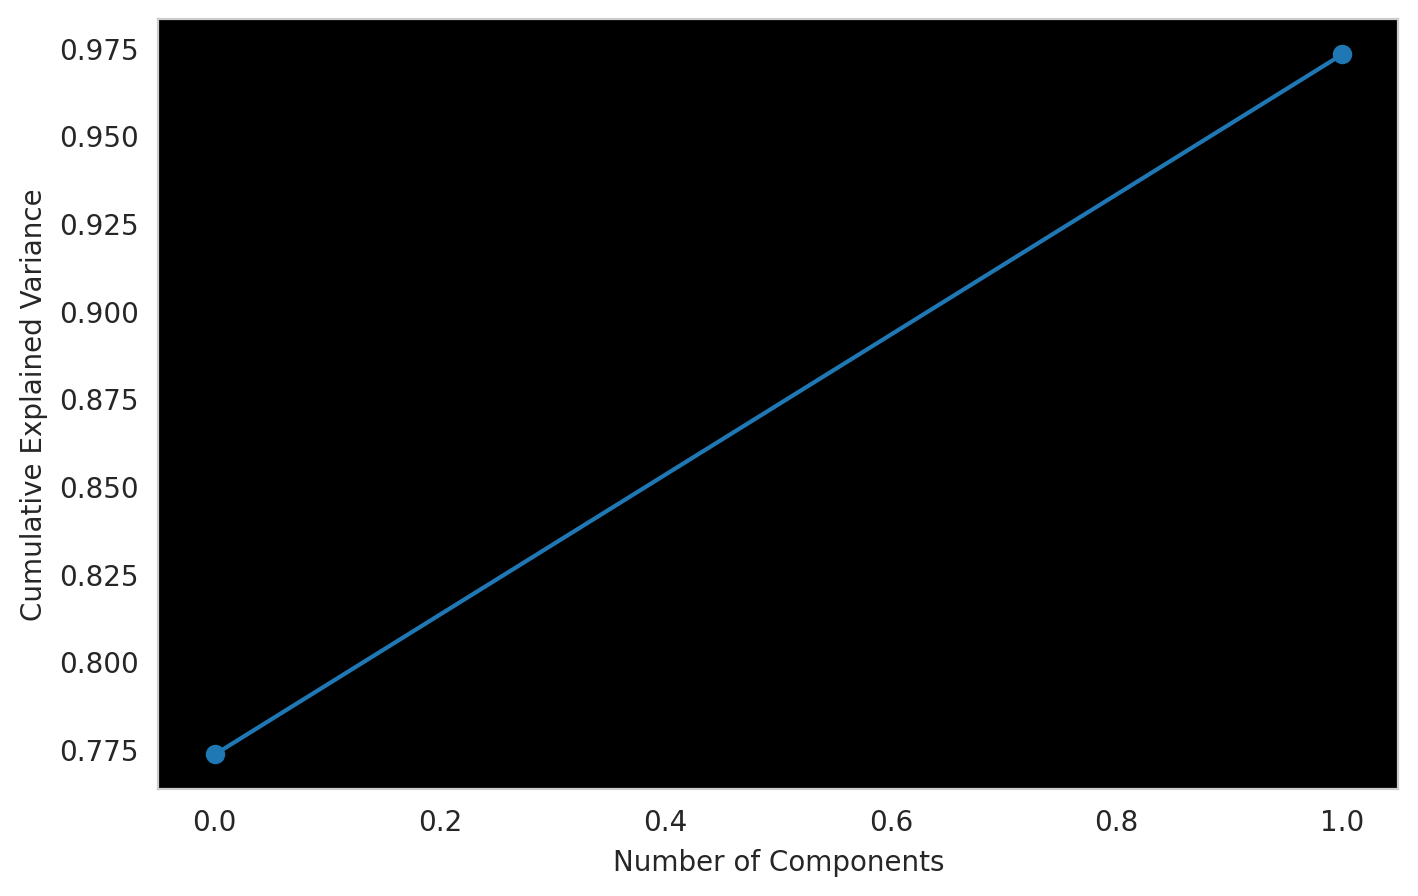

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid()
plt.show()

In [ ]:
pca_cols = [f'PC{i+1}' for i in range(X_train_pca.shape[1])]

df_train_pca = pd.DataFrame(X_train_pca, columns=pca_cols)
df_test_pca  = pd.DataFrame(X_test_pca, columns=pca_cols)

# Add back engine & cycle if needed
df_train_pca = pd.concat([df_train[index_names].reset_index(drop=True),
                           df_train_pca], axis=1)

df_test_pca = pd.concat([df_test[index_names].reset_index(drop=True),
                          df_test_pca], axis=1)


In [ ]:
loadings = pd.DataFrame(
    pca.components_.T,
    index=feature_cols,
    columns=pca_cols
)

print(loadings)

                                              PC1       PC2
setting_1                               -0.191833  0.252828
setting_2                               -0.190270  0.224989
setting_3                                0.134038  0.372202
(Fan inlet temperature) (◦R)             0.205054 -0.195141
(LPC outlet temperature) (◦R)            0.227233 -0.049929
(HPC outlet temperature) (◦R)            0.230419  0.026060
(LPT outlet temperature) (◦R)            0.231260 -0.016151
(Fan inlet Pressure) (psia)              0.202348 -0.220213
(bypass-duct pressure) (psia)            0.211238 -0.185346
(HPC outlet pressure) (psia)             0.220781 -0.137226
(Physical fan speed) (rpm)               0.200833  0.224268
(Physical core speed) (rpm)              0.230340  0.034770
(Engine pressure ratio(P50/P2)           0.223279 -0.020368
(HPC outlet Static pressure) (psia)      0.219680  0.142513
(Ratio of fuel flow to Ps30) (pps/psia)  0.220885 -0.136603
(Corrected fan speed) (rpm)             

# Random Forest with top 20 features

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [ ]:
import time
model_performance = pd.DataFrame(columns=['r-Squared','RMSE','total time'])

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import make_scorer, accuracy_score

import sklearn
from sklearn.metrics import mean_squared_error, r2_score
# from sklearn.ensemble import RandomForestRegressor

model_performance = pd.DataFrame(columns=['R2','RMSE', 'time to train','time to predict','total time'])


def R_squared(y_true, y_pred):
    SS_res =  K.sum(K.square(y_true - y_pred))
    SS_tot = K.sum(K.square(y_true - K.mean(y_true)))
    return 1 - SS_res/(SS_tot + K.epsilon())

In [ ]:
df_test_cycle = df_test.groupby(['engine']).agg({'cycle':'max'})
df_test_cycle.rename(columns={'cycle':'life'},inplace=True)
df_test_max = df_test.merge(df_test_cycle,how='left',on=['engine'])
df_test_max = df_test_max[(df_test_max['cycle']==df_test_max['life'])]
df_test_max.drop(['life'],axis=1,inplace=True)
# df_test_max

In [ ]:
# Importance based on PC1
importance_sorted = loadings['PC2'].abs().sort_values(ascending=False).head(7)

In [ ]:
# Top 20 features
top_20_features = importance_sorted.head(20)

top_20_features

,PC2
(Corrected fan speed) (rpm),0.372217
(Required fan conversion speed),0.372202
setting_3,0.372202
(Corrected core speed) (rpm),0.285430
setting_1,0.252828
setting_2,0.224989
(Required fan speed),0.224442


In [ ]:
feature_names = top_20_features.index.tolist()
feature_names

['(Corrected fan speed) (rpm)',
 '(Required fan conversion speed)',
 'setting_3',
 '(Corrected core speed) (rpm)',
 'setting_1',
 'setting_2',
 '(Required fan speed)']

In [ ]:
df_train_top20 = df_train[index_names + feature_names]
df_test_top20  = df_test[index_names + feature_names]

In [ ]:
df_train_top20.head()

,engine,cycle,(Corrected fan speed) (rpm),(Required fan conversion speed),setting_3,(Corrected core speed) (rpm),setting_1,setting_2,(Required fan speed)
0,1,1,2387.99,100.00,100.0,8074.83,42.0049,0.8400,2212
1,1,2,2387.73,100.00,100.0,8046.13,20.0020,0.7002,2324
2,1,3,2387.97,100.00,100.0,8066.62,42.0038,0.8409,2212
3,1,4,2388.02,100.00,100.0,8076.05,42.0000,0.8400,2212
4,1,5,2028.08,84.93,60.0,7865.80,25.0063,0.6207,1915


In [ ]:
df_train_top20.shape

(61249, 9)

In [ ]:
# Compute RUL for training data
df_train_top20['RUL'] = df_train_top20.groupby('engine')['cycle'].transform('max') - df_train_top20['cycle']


In [ ]:
selected_features = feature_names  # from previous step

df_train = df_train_top20[['engine', 'cycle'] + selected_features + ['RUL']]
df_test  = df_test[['engine', 'cycle'] + selected_features]


In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

df_train[selected_features] = scaler.fit_transform(df_train[selected_features])
df_test[selected_features]  = scaler.transform(df_test[selected_features])


In [ ]:
X_train = df_train[feature_names]
y_train = df_train.iloc[:,-1]
X_test = df_test_max[feature_names]
y_test = df_test_RUL.iloc[:,-1]

In [ ]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [ ]:
%%time
from sklearn.ensemble import RandomForestRegressor
start = time.time()
model = RandomForestRegressor(n_jobs=-1,
                              n_estimators=500,
                              min_samples_leaf=1,
                              max_features='sqrt',
                             ).fit(X_train,y_train)
end_train = time.time()
y_predictions = model.predict(X_test) # These are the predictions from the test data.
end_predict = time.time()

# Calculate RMSE
mse = mean_squared_error(y_test, y_predictions)
rmse = np.sqrt(mse)

model_performance.loc['Random Forest'] = [model.score(X_test,y_test),
                                   rmse,
                                   end_train-start,
                                   end_predict-end_train,
                                   end_predict-start]

print('R-squared error: '+ "{:.2%}".format(model.score(X_test,y_test)))
print('Root Mean Squared Error: '+ "{:.2f}".format(rmse))

R-squared error: -163.83%
Root Mean Squared Error: 88.56
CPU times: user 1min 34s, sys: 2.18 s, total: 1min 36s
Wall time: 58.2 s


# random forest with top 16 features

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [ ]:
import time
model_performance = pd.DataFrame(columns=['r-Squared','RMSE','total time'])

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import make_scorer, accuracy_score

import sklearn
from sklearn.metrics import mean_squared_error, r2_score
# from sklearn.ensemble import RandomForestRegressor

model_performance = pd.DataFrame(columns=['R2','RMSE', 'time to train','time to predict','total time'])


def R_squared(y_true, y_pred):
    SS_res =  K.sum(K.square(y_true - y_pred))
    SS_tot = K.sum(K.square(y_true - K.mean(y_true)))
    return 1 - SS_res/(SS_tot + K.epsilon())

In [ ]:
df_test_cycle = df_test.groupby(['engine']).agg({'cycle':'max'})
df_test_cycle.rename(columns={'cycle':'life'},inplace=True)
df_test_max = df_test.merge(df_test_cycle,how='left',on=['engine'])
df_test_max = df_test_max[(df_test_max['cycle']==df_test_max['life'])]
df_test_max.drop(['life'],axis=1,inplace=True)
# df_test_max

In [ ]:
# Importance based on PC1
importance_sorted = loadings['PC1'].abs().sort_values(ascending=False).head(16)

In [ ]:
# Top 20 features
top_16_features = importance_sorted.head(16)

top_16_features

,PC1
(LPT outlet temperature) (◦R),0.231260
(Bleed Enthalpy),0.230523
(HPC outlet temperature) (◦R),0.230419
(Physical core speed) (rpm),0.230340
(LPC outlet temperature) (◦R),0.227233
(Engine pressure ratio(P50/P2),0.223279
(Ratio of fuel flow to Ps30) (pps/psia),0.220885
(HPC outlet pressure) (psia),0.220781
(HPC outlet Static pressure) (psia),0.219680
(High-pressure turbines Cool air flow),0.218334


In [ ]:
feature_names = top_16_features.index.tolist()
feature_names

['(LPT outlet temperature) (◦R)',
 '(Bleed Enthalpy)',
 '(HPC outlet temperature) (◦R)',
 '(Physical core speed) (rpm)',
 '(LPC outlet temperature) (◦R)',
 '(Engine pressure ratio(P50/P2)',
 '(Ratio of fuel flow to Ps30) (pps/psia)',
 '(HPC outlet pressure) (psia)',
 '(HPC outlet Static pressure) (psia)',
 '(High-pressure turbines Cool air flow)',
 '(Low-pressure turbines Cool air flow)',
 '(bypass-duct pressure) (psia)',
 '(Fan inlet temperature) (◦R)',
 '(Fan inlet Pressure) (psia)',
 '(Bypass Ratio) ',
 '(Physical fan speed) (rpm)']

In [ ]:
df_train_top16 = df_train[index_names + feature_names]
df_test_top16  = df_test[index_names + feature_names]

In [ ]:
df_train_top16.head()

,engine,cycle,(LPT outlet temperature) (◦R),(Bleed Enthalpy),(HPC outlet temperature) (◦R),(Physical core speed) (rpm),(LPC outlet temperature) (◦R),(Engine pressure ratio(P50/P2),(Ratio of fuel flow to Ps30) (pps/psia),(HPC outlet pressure) (psia),(HPC outlet Static pressure) (psia),(High-pressure turbines Cool air flow),(Low-pressure turbines Cool air flow),(bypass-duct pressure) (psia),(Fan inlet temperature) (◦R),(Fan inlet Pressure) (psia),(Bypass Ratio),(Physical fan speed) (rpm)
0,1,1,1112.93,330,1343.43,8311.32,549.68,1.01,129.78,137.36,41.69,10.62,6.3670,5.70,445.00,3.91,9.3335,2211.86
1,1,2,1237.50,361,1477.61,8713.60,606.07,1.07,312.59,332.10,43.94,24.37,14.6552,13.61,491.19,9.35,9.1913,2323.66
2,1,3,1117.05,329,1343.12,8306.69,548.95,1.01,129.62,138.18,41.66,10.48,6.4213,5.69,445.00,3.91,9.4007,2211.92
3,1,4,1118.03,328,1341.24,8312.35,548.70,1.02,129.80,137.98,41.68,10.54,6.4176,5.70,445.00,3.91,9.3369,2211.88
4,1,5,1033.59,305,1255.23,7994.94,536.10,0.93,164.11,174.82,36.48,14.03,8.6754,9.00,462.54,7.05,10.8366,1915.22


In [ ]:
df_train_top16.shape

(61249, 18)

In [ ]:
# Compute RUL for training data
df_train_top16['RUL'] = df_train_top16.groupby('engine')['cycle'].transform('max') - df_train_top16['cycle']


In [ ]:
selected_features = feature_names  # from previous step

df_train = df_train_top16[['engine', 'cycle'] + selected_features + ['RUL']]
df_test  = df_test[['engine', 'cycle'] + selected_features]


In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

df_train[selected_features] = scaler.fit_transform(df_train[selected_features])
df_test[selected_features]  = scaler.transform(df_test[selected_features])


In [ ]:
X_train = df_train[feature_names]
y_train = df_train.iloc[:,-1]
X_test = df_test_max[feature_names]
y_test = df_test_RUL.iloc[:,-1]

In [ ]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [ ]:
%%time
from sklearn.ensemble import RandomForestRegressor
start = time.time()
model = RandomForestRegressor(n_jobs=-1,
                              n_estimators=500,
                              min_samples_leaf=1,
                              max_features='sqrt',
                             ).fit(X_train,y_train)
end_train = time.time()
y_predictions = model.predict(X_test) # These are the predictions from the test data.
end_predict = time.time()

# Calculate RMSE
mse = mean_squared_error(y_test, y_predictions)
rmse = np.sqrt(mse)

model_performance.loc['Random Forest'] = [model.score(X_test,y_test),
                                   rmse,
                                   end_train-start,
                                   end_predict-end_train,
                                   end_predict-start]

print('R-squared error: '+ "{:.2%}".format(model.score(X_test,y_test)))
print('Root Mean Squared Error: '+ "{:.2f}".format(rmse))

R-squared error: -138.87%
Root Mean Squared Error: 84.27
CPU times: user 4min 41s, sys: 6.3 s, total: 4min 48s
Wall time: 3min 7s


# random forest with top 10 features

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [ ]:
import time
model_performance = pd.DataFrame(columns=['r-Squared','RMSE','total time'])

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import make_scorer, accuracy_score

import sklearn
from sklearn.metrics import mean_squared_error, r2_score
# from sklearn.ensemble import RandomForestRegressor

model_performance = pd.DataFrame(columns=['R2','RMSE', 'time to train','time to predict','total time'])


def R_squared(y_true, y_pred):
    SS_res =  K.sum(K.square(y_true - y_pred))
    SS_tot = K.sum(K.square(y_true - K.mean(y_true)))
    return 1 - SS_res/(SS_tot + K.epsilon())

In [ ]:
df_test_cycle = df_test.groupby(['engine']).agg({'cycle':'max'})
df_test_cycle.rename(columns={'cycle':'life'},inplace=True)
df_test_max = df_test.merge(df_test_cycle,how='left',on=['engine'])
df_test_max = df_test_max[(df_test_max['cycle']==df_test_max['life'])]
df_test_max.drop(['life'],axis=1,inplace=True)
# df_test_max

In [ ]:
# Importance based on PC1
importance_sorted = loadings['PC1'].abs().sort_values(ascending=False).head(10)

In [ ]:
# Top 20 features
top_10_features = importance_sorted.head(10)

top_10_features

,PC1
(LPT outlet temperature) (◦R),0.231260
(Bleed Enthalpy),0.230523
(HPC outlet temperature) (◦R),0.230419
(Physical core speed) (rpm),0.230340
(LPC outlet temperature) (◦R),0.227233
(Engine pressure ratio(P50/P2),0.223279
(Ratio of fuel flow to Ps30) (pps/psia),0.220885
(HPC outlet pressure) (psia),0.220781
(HPC outlet Static pressure) (psia),0.219680
(High-pressure turbines Cool air flow),0.218334


In [ ]:
feature_names = top_10_features.index.tolist()
feature_names

['(LPT outlet temperature) (◦R)',
 '(Bleed Enthalpy)',
 '(HPC outlet temperature) (◦R)',
 '(Physical core speed) (rpm)',
 '(LPC outlet temperature) (◦R)',
 '(Engine pressure ratio(P50/P2)',
 '(Ratio of fuel flow to Ps30) (pps/psia)',
 '(HPC outlet pressure) (psia)',
 '(HPC outlet Static pressure) (psia)',
 '(High-pressure turbines Cool air flow)']

In [ ]:
df_train_top10 = df_train[index_names + feature_names]
df_test_top10 = df_test[index_names + feature_names]

In [ ]:
df_train_top16.head()

,engine,cycle,(LPT outlet temperature) (◦R),(Bleed Enthalpy),(HPC outlet temperature) (◦R),(Physical core speed) (rpm),(LPC outlet temperature) (◦R),(Engine pressure ratio(P50/P2),(Ratio of fuel flow to Ps30) (pps/psia),(HPC outlet pressure) (psia),(HPC outlet Static pressure) (psia),(High-pressure turbines Cool air flow),(Low-pressure turbines Cool air flow),(bypass-duct pressure) (psia),(Fan inlet temperature) (◦R),(Fan inlet Pressure) (psia),(Bypass Ratio),(Physical fan speed) (rpm)
0,1,1,0.212586,0.288660,0.272082,0.269578,0.130347,0.205128,0.003593,0.002738,0.458604,0.015473,0.015881,0.001882,0.000000,0.000000,0.400540,0.626983
1,1,2,0.511781,0.608247,0.634407,0.601411,0.647971,0.358974,0.450364,0.450787,0.641234,0.477968,0.481487,0.498118,0.626985,0.507937,0.351346,0.862888
2,1,3,0.222481,0.278351,0.271245,0.265759,0.123646,0.205128,0.003202,0.004625,0.456169,0.010764,0.018932,0.001255,0.000000,0.000000,0.423787,0.627110
3,1,4,0.224835,0.268041,0.266168,0.270428,0.121351,0.230769,0.003641,0.004164,0.457792,0.012782,0.018724,0.001882,0.000000,0.000000,0.401716,0.627026
4,1,5,0.022025,0.030928,0.033916,0.008603,0.005691,0.000000,0.087492,0.088924,0.035714,0.130172,0.145560,0.208908,0.238089,0.293184,0.920536,0.001055


In [ ]:
df_train_top10.shape

(61249, 12)

In [ ]:
# Compute RUL for training data
df_train_top10['RUL'] = df_train_top10.groupby('engine')['cycle'].transform('max') - df_train_top10['cycle']


In [ ]:
selected_features = feature_names  # from previous step

df_train = df_train_top10[['engine', 'cycle'] + selected_features + ['RUL']]
df_test  = df_test[['engine', 'cycle'] + selected_features]


In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

df_train[selected_features] = scaler.fit_transform(df_train[selected_features])
df_test[selected_features]  = scaler.transform(df_test[selected_features])


In [ ]:
X_train = df_train[feature_names]
y_train = df_train.iloc[:,-1]
X_test = df_test_max[feature_names]
y_test = df_test_RUL.iloc[:,-1]

In [ ]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [ ]:
%%time
from sklearn.ensemble import RandomForestRegressor
start = time.time()
model = RandomForestRegressor(n_jobs=-1,
                              n_estimators=500,
                              min_samples_leaf=1,
                              max_features='sqrt',
                             ).fit(X_train,y_train)
end_train = time.time()
y_predictions = model.predict(X_test) # These are the predictions from the test data.
end_predict = time.time()

# Calculate RMSE
mse = mean_squared_error(y_test, y_predictions)
rmse = np.sqrt(mse)

model_performance.loc['Random Forest'] = [model.score(X_test,y_test),
                                   rmse,
                                   end_train-start,
                                   end_predict-end_train,
                                   end_predict-start]

print('R-squared error: '+ "{:.2%}".format(model.score(X_test,y_test)))
print('Root Mean Squared Error: '+ "{:.2f}".format(rmse))

R-squared error: -818.28%
Root Mean Squared Error: 165.22
CPU times: user 4min 2s, sys: 2.44 s, total: 4min 5s
Wall time: 2min 46s


# all features

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [ ]:
import time
model_performance = pd.DataFrame(columns=['r-Squared','RMSE','total time'])

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import make_scorer, accuracy_score

import sklearn
from sklearn.metrics import mean_squared_error, r2_score
# from sklearn.ensemble import RandomForestRegressor

model_performance = pd.DataFrame(columns=['R2','RMSE', 'time to train','time to predict','total time'])


def R_squared(y_true, y_pred):
    SS_res =  K.sum(K.square(y_true - y_pred))
    SS_tot = K.sum(K.square(y_true - K.mean(y_true)))
    return 1 - SS_res/(SS_tot + K.epsilon())

In [ ]:
df_test_cycle = df_test.groupby(['engine']).agg({'cycle':'max'})
df_test_cycle.rename(columns={'cycle':'life'},inplace=True)
df_test_max = df_test.merge(df_test_cycle,how='left',on=['engine'])
df_test_max = df_test_max[(df_test_max['cycle']==df_test_max['life'])]
df_test_max.drop(['life'],axis=1,inplace=True)
# df_test_max

In [ ]:
# Importance based on PC1
importance_sorted = loadings['PC1'].abs().sort_values(ascending=False)

In [ ]:
# Top 20 features
all_features = importance_sorted

all_features

,PC1
(LPT outlet temperature) (◦R),0.231260
(Bleed Enthalpy),0.230523
(HPC outlet temperature) (◦R),0.230419
(Physical core speed) (rpm),0.230340
(LPC outlet temperature) (◦R),0.227233
(Engine pressure ratio(P50/P2),0.223279
(Ratio of fuel flow to Ps30) (pps/psia),0.220885
(HPC outlet pressure) (psia),0.220781
(HPC outlet Static pressure) (psia),0.219680
(High-pressure turbines Cool air flow),0.218334


In [ ]:
feature_names = all_features.index.tolist()
feature_names

['(LPT outlet temperature) (◦R)',
 '(Bleed Enthalpy)',
 '(HPC outlet temperature) (◦R)',
 '(Physical core speed) (rpm)',
 '(LPC outlet temperature) (◦R)',
 '(Engine pressure ratio(P50/P2)',
 '(Ratio of fuel flow to Ps30) (pps/psia)',
 '(HPC outlet pressure) (psia)',
 '(HPC outlet Static pressure) (psia)',
 '(High-pressure turbines Cool air flow)',
 '(Low-pressure turbines Cool air flow)',
 '(bypass-duct pressure) (psia)',
 '(Fan inlet temperature) (◦R)',
 '(Fan inlet Pressure) (psia)',
 '(Bypass Ratio) ',
 '(Physical fan speed) (rpm)',
 '(Required fan speed)',
 '(Burner fuel-air ratio)',
 'setting_1',
 'setting_2',
 '(Corrected core speed) (rpm)',
 '(Corrected fan speed) (rpm)',
 'setting_3',
 '(Required fan conversion speed)']

In [ ]:
df_train_all = df_train[index_names + feature_names]
df_test_all = df_test[index_names + feature_names]

In [ ]:
df_train_all.head()

,engine,cycle,(LPT outlet temperature) (◦R),(Bleed Enthalpy),(HPC outlet temperature) (◦R),(Physical core speed) (rpm),(LPC outlet temperature) (◦R),(Engine pressure ratio(P50/P2),(Ratio of fuel flow to Ps30) (pps/psia),(HPC outlet pressure) (psia),(HPC outlet Static pressure) (psia),(High-pressure turbines Cool air flow),(Low-pressure turbines Cool air flow),(bypass-duct pressure) (psia),(Fan inlet temperature) (◦R),(Fan inlet Pressure) (psia),(Bypass Ratio),(Physical fan speed) (rpm),(Required fan speed),(Burner fuel-air ratio),setting_1,setting_2,(Corrected core speed) (rpm),(Corrected fan speed) (rpm),setting_3,(Required fan conversion speed)
0,1,1,1112.93,330,1343.43,8311.32,549.68,1.01,129.78,137.36,41.69,10.62,6.3670,5.70,445.00,3.91,9.3335,2211.86,2212,0.02,42.0049,0.8400,8074.83,2387.99,100.0,100.00
1,1,2,1237.50,361,1477.61,8713.60,606.07,1.07,312.59,332.10,43.94,24.37,14.6552,13.61,491.19,9.35,9.1913,2323.66,2324,0.02,20.0020,0.7002,8046.13,2387.73,100.0,100.00
2,1,3,1117.05,329,1343.12,8306.69,548.95,1.01,129.62,138.18,41.66,10.48,6.4213,5.69,445.00,3.91,9.4007,2211.92,2212,0.02,42.0038,0.8409,8066.62,2387.97,100.0,100.00
3,1,4,1118.03,328,1341.24,8312.35,548.70,1.02,129.80,137.98,41.68,10.54,6.4176,5.70,445.00,3.91,9.3369,2211.88,2212,0.02,42.0000,0.8400,8076.05,2388.02,100.0,100.00
4,1,5,1033.59,305,1255.23,7994.94,536.10,0.93,164.11,174.82,36.48,14.03,8.6754,9.00,462.54,7.05,10.8366,1915.22,1915,0.02,25.0063,0.6207,7865.80,2028.08,60.0,84.93


In [ ]:
df_train_all.shape

(61249, 26)

In [ ]:
# Compute RUL for training data
df_train_all['RUL'] = df_train_all.groupby('engine')['cycle'].transform('max') - df_train_all['cycle']


In [ ]:
selected_features = feature_names
df_train = df_train_all[['engine', 'cycle'] + selected_features + ['RUL']]
df_test  = df_test[['engine', 'cycle'] + selected_features]


In [ ]:
selected_features = feature_names

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

df_train[selected_features] = scaler.fit_transform(df_train[selected_features])
df_test[selected_features]  = scaler.transform(df_test[selected_features])


In [ ]:
X_train = df_train[feature_names]
y_train = df_train.iloc[:,-1]
X_test = df_test_max[feature_names]
y_test = df_test_RUL.iloc[:,-1]

In [ ]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [ ]:
%%time
from sklearn.ensemble import RandomForestRegressor
start = time.time()
model = RandomForestRegressor(n_jobs=-1,
                              n_estimators=500,
                              min_samples_leaf=1,
                              max_features='sqrt',
                             ).fit(X_train,y_train)
end_train = time.time()
y_predictions = model.predict(X_test) # These are the predictions from the test data.
end_predict = time.time()

# Calculate RMSE
mse = mean_squared_error(y_test, y_predictions)
rmse = np.sqrt(mse)

model_performance.loc['Random Forest'] = [model.score(X_test,y_test),
                                   rmse,
                                   end_train-start,
                                   end_predict-end_train,
                                   end_predict-start]

print('R-squared error: '+ "{:.2%}".format(model.score(X_test,y_test)))
print('Root Mean Squared Error: '+ "{:.2f}".format(rmse))

R-squared error: -113.65%
Root Mean Squared Error: 79.70
CPU times: user 4min 11s, sys: 5.45 s, total: 4min 17s
Wall time: 3min 14s
